## Presented by Vibhudendra S, upGrad & IIITB | Data Science Program - February 2024, Batch ID 5702

### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provi er BoomBi es has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [3]:
## Importing the standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
## Importing the dataset

df = pd.read_csv('day.csv')

### Data Understanding ###

In [7]:
## Checking the dataset first 5 rows

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
### Checking the shape of dataset

df.shape

(730, 16)

##### This dataset has 730 records & 16 features

In [10]:
#### Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
### Understanding the numerical features

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
### As this is not a time series forecasting, we intend to drop 'dteday'
### 'instant' is just a serial number in sequence which is insignificant for current business problem, hence we drop this feature

df = df.drop(['instant', 'dteday'], axis = 1)

In [13]:
df.shape

(730, 14)

### After dropping 2 features from the original dataset, we have 730 records & 14 features

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


### Data Pre-processing

#### There are no 'null' values in any of the 14 features

#### Need to visualize & manage humidity records having Zero as minimum value as humidity cannot be practically zero

In [20]:
df[df['hum'] == 0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,1,0,3,0,6,0,3,15.952731,19.2834,0.0,17.545759,46,577,623


#### Only 1 record has Zero humidity, hence we drop this record

In [22]:
df = df.drop(df[df['hum'] == 0].index)

In [23]:
df.shape

(729, 14)

In [24]:
df['season'].info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 0 to 729
Series name: season
Non-Null Count  Dtype
--------------  -----
729 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


In [25]:
df['season'].value_counts()

season
3    188
2    184
1    179
4    178
Name: count, dtype: int64

#### Converting 'season' feature into categorical string variables instead of numercial variable

In [27]:
df = df.replace({'season':{1:'spring', 2: 'summer', 3: 'fall', 4: 'winter'}})
df['season'] = df['season'].astype(str)

In [28]:
df['season'].info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 0 to 729
Series name: season
Non-Null Count  Dtype 
--------------  ----- 
729 non-null    object
dtypes: object(1)
memory usage: 11.4+ KB


In [29]:
df['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [30]:
df['season'].value_counts()

season
fall      188
summer    184
spring    179
winter    178
Name: count, dtype: int64

#### Converting 'weathersit' feature into categorical string variables instead of numercial variable

In [32]:
df = df.replace({'weathersit':{1:'clear', 2: 'misty', 3: 'light snow', 4: 'heavy rain'}})
df['weathersit'] = df['weathersit'].astype(str)

In [33]:
df['weathersit'].info()

<class 'pandas.core.series.Series'>
Index: 729 entries, 0 to 729
Series name: weathersit
Non-Null Count  Dtype 
--------------  ----- 
729 non-null    object
dtypes: object(1)
memory usage: 11.4+ KB


In [34]:
df['weathersit'].unique()

array(['misty', 'clear', 'light snow'], dtype=object)

In [35]:
df['weathersit'].value_counts()

weathersit
clear         463
misty         246
light snow     20
Name: count, dtype: int64

#### Converting 'yr' feature from 0 & 1 to 2018 and 2019

In [37]:
df = df.replace({'yr':{0: 2018, 1: 2019}})

In [38]:
df['yr'].unique()

array([2018, 2019], dtype=int64)

In [39]:
df['yr'].value_counts()

yr
2019    365
2018    364
Name: count, dtype: int64

#### Rectified dataset viewing

In [41]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,1,0,1,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,1,0,2,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [42]:
df.shape

(729, 14)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    object 
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    int64  
 3   holiday     729 non-null    int64  
 4   weekday     729 non-null    int64  
 5   workingday  729 non-null    int64  
 6   weathersit  729 non-null    object 
 7   temp        729 non-null    float64
 8   atemp       729 non-null    float64
 9   hum         729 non-null    float64
 10  windspeed   729 non-null    float64
 11  casual      729 non-null    int64  
 12  registered  729 non-null    int64  
 13  cnt         729 non-null    int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 85.4+ KB


In [44]:
df.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,2018.500686,6.530864,0.028807,2.991770,0.691358,20.325249,23.732416,62.851273,12.757060,850.351166,3662.984911,4513.336077
std,0.500343,3.450107,0.167377,1.998609,0.462250,7.510137,8.154239,14.055910,5.196382,686.304927,1556.639192,1931.975331
min,2018.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,18.791700,1.500244,2.000000,20.000000,22.000000
25%,2018.000000,4.000000,0.000000,1.000000,0.000000,13.803347,16.887300,52.000000,9.041650,317.000000,2506.000000,3190.000000
50%,2019.000000,7.000000,0.000000,3.000000,1.000000,20.500000,24.399800,62.666700,12.125325,721.000000,3667.000000,4549.000000
75%,2019.000000,10.000000,0.000000,5.000000,1.000000,26.889153,30.461450,73.000000,15.624936,1097.000000,4790.000000,5976.000000
max,2019.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Visualization

In [46]:
## Creating a list of numerical and categorical features

num_f = df.select_dtypes(exclude=['object']).columns
print(num_f)
cat_f = ['season', 'weathersit']
print(cat_f)

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')
['season', 'weathersit']


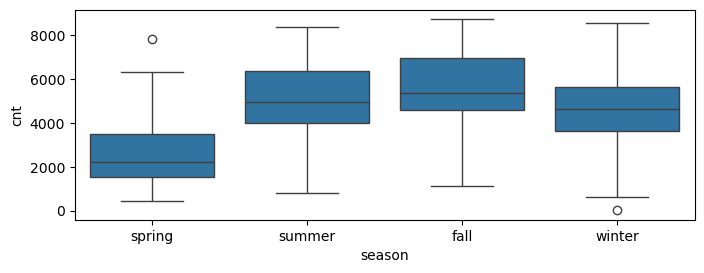

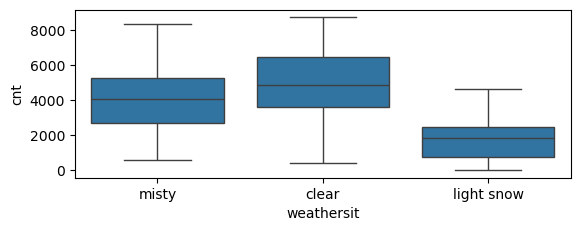

In [47]:
plt.figure(figsize = [8,6])
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.show()
plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Majority demand for shared bikes is clearly around 6,000 for all 3 seasons except during spring whose demand is around 4,000 only, 33% lesser
#### Majority demand for shared bikes is clearly around 6,000 in misty & clear weather conditions but dips to around 3,000 only during light snow weather, 50% lesser

<Figure size 600x300 with 0 Axes>

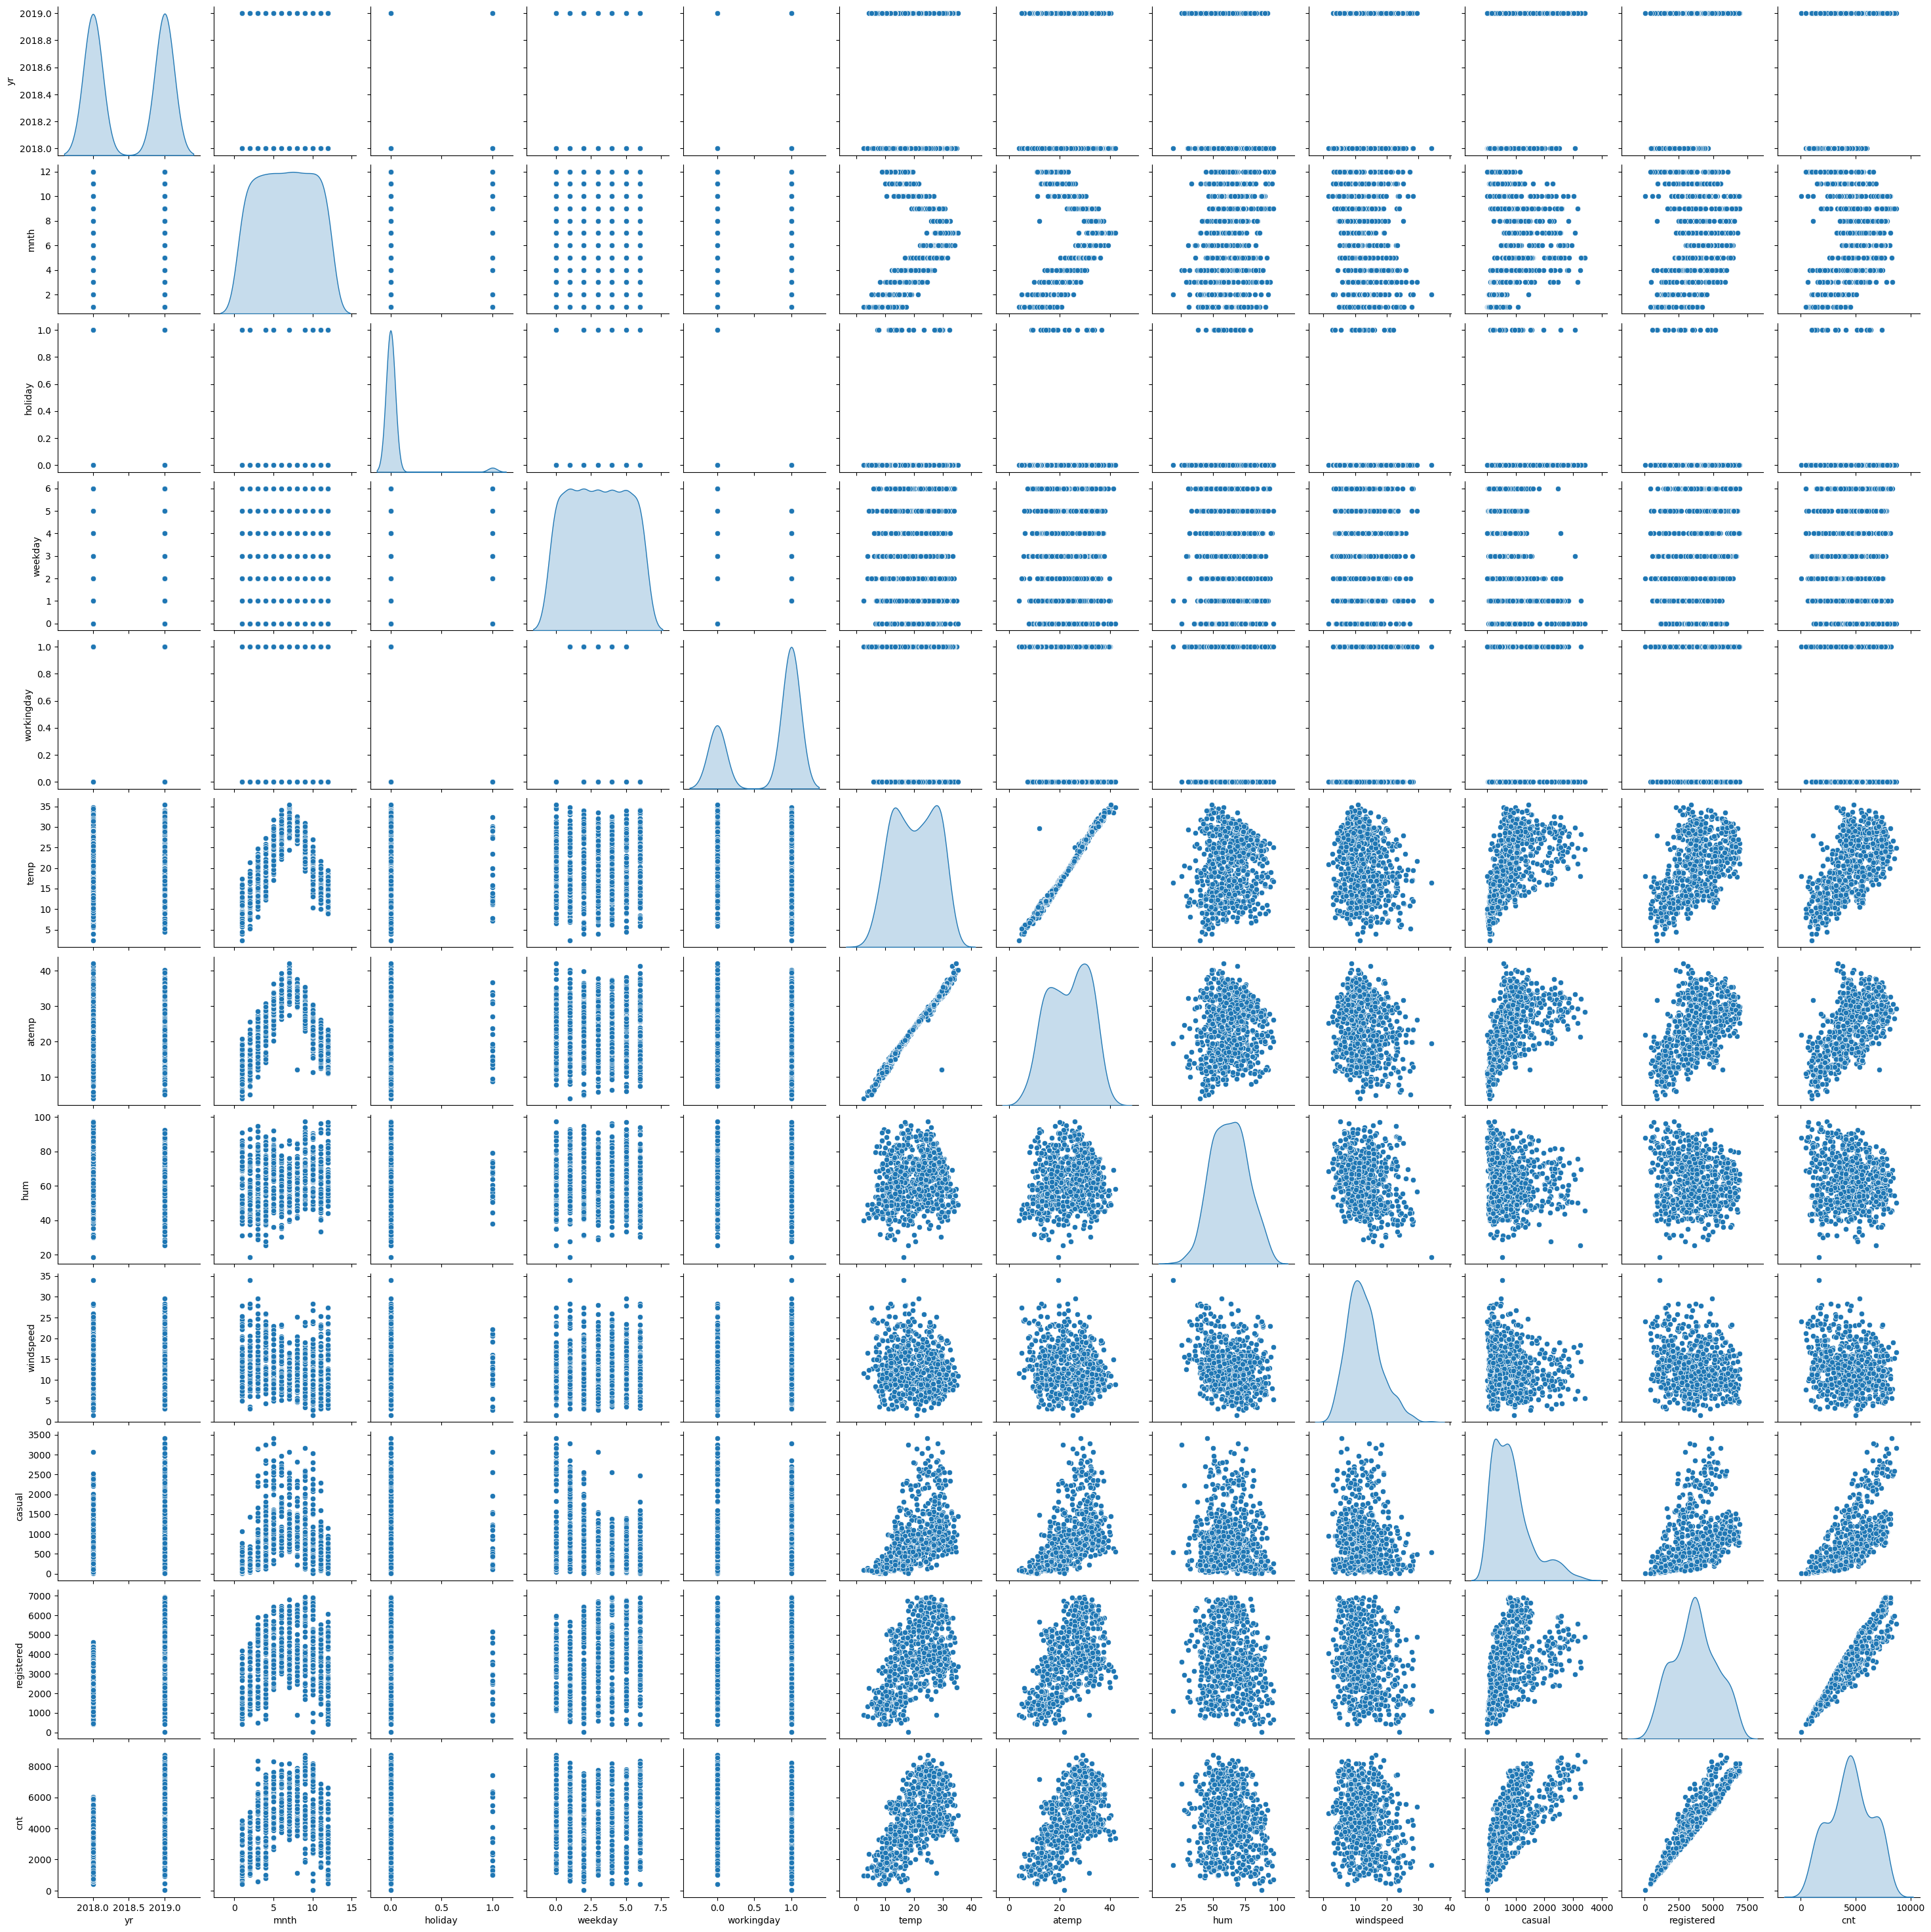

In [49]:
plt.figure(figsize = [6,3])
sns.pairplot(data = df, diag_kind = 'kde')
plt.show()

#### features like 'temp', 'atemp', 'casual users' & 'registered uers' have linear correlation against target feature 'cnt'

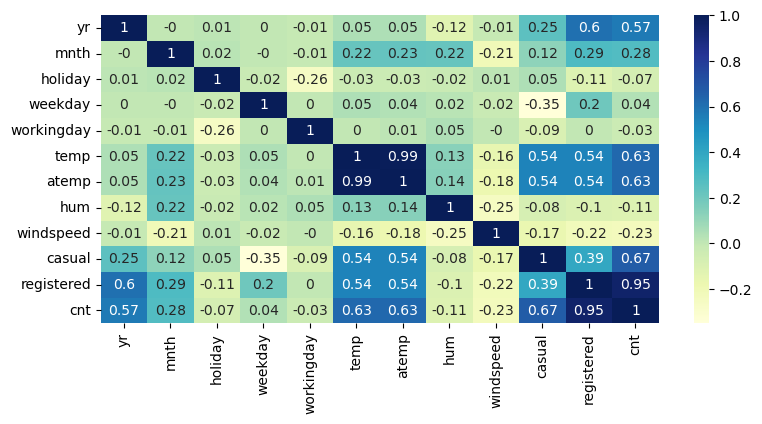

In [51]:
## Visualizing the correlation with heat map

plt.figure(figsize = [9,4])
sns.heatmap(df[num_f].corr().round(2), annot = True, cmap="YlGnBu")
plt.show()

#### features like 'yr','temp', 'atemp', 'casual users' & 'registered uers' have higher correlation against target feature 'cnt'

### Data Preparation

In [54]:
## Converting two features 'season' & 'weathersit' into numerical features using dummies

dum_df = pd.get_dummies(df[['season', 'weathersit']], drop_first = True, dtype = 'int')
df = pd.concat( [df, dum_df] , axis = 1 )
df.drop(['season', 'weathersit'], axis = 1, inplace = True)

In [55]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light snow,weathersit_misty
0,2018,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,2018,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,2018,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,2018,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,2018,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [56]:
df.shape

(729, 17)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     729 non-null    int64  
 1   mnth                   729 non-null    int64  
 2   holiday                729 non-null    int64  
 3   weekday                729 non-null    int64  
 4   workingday             729 non-null    int64  
 5   temp                   729 non-null    float64
 6   atemp                  729 non-null    float64
 7   hum                    729 non-null    float64
 8   windspeed              729 non-null    float64
 9   casual                 729 non-null    int64  
 10  registered             729 non-null    int64  
 11  cnt                    729 non-null    int64  
 12  season_spring          729 non-null    int32  
 13  season_summer          729 non-null    int32  
 14  season_winter          729 non-null    int32  
 15  weathersit_

### All the 17 features have now been converted to numerical type

## Splitting the data into Train and Test sets

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features using MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [64]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light snow,weathersit_misty
626,1.0,0.727273,0,0.666667,1,0.614763,0.635584,0.450242,0.371638,0.229050,0.978101,0.864421,0,0,0,0,0
364,0.0,1.000000,0,0.166667,1,0.437201,0.461603,0.552447,0.382342,0.192884,0.215008,0.247978,1,0,0,0,0
426,1.0,0.181818,0,0.000000,0,0.442393,0.460736,0.559440,0.255342,0.278448,0.412557,0.438851,1,0,0,0,1
728,1.0,1.000000,0,0.166667,1,0.245101,0.210280,0.381387,0.663106,0.104381,0.155590,0.164795,1,0,0,0,0
482,1.0,0.272727,0,0.000000,0,0.395666,0.411155,0.389456,0.188475,0.326669,0.411026,0.457443,0,1,0,0,1


### Dividing into X and Y sets for the model building

In [66]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

### we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', False, 3),
 ('weekday', False, 4),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 6),
 ('casual', True, 1),
 ('registered', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('weathersit_light snow', False, 7),
 ('weathersit_misty', False, 5)]

### Building model using statsmodel, for the detailed statistics

In [73]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

In [74]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [75]:
#summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.035e+30
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:03:50   Log-Likelihood:                 17252.
No. Observations:                 510   AIC:                        -3.447e+04
Df Residuals:                     493   BIC:                        -3.440e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

### Checking VIF

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,395.66
6,atemp,377.72
10,registered,24.09
7,hum,20.12
1,mnth,10.91
9,casual,5.73
0,yr,5.23
8,windspeed,5.19
3,weekday,4.67
13,season_winter,4.52


### Dropping the variable and updating the model

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'atemp' as it has a very high p-value of 0.764 & VIF of 377.72. Let's go ahead and drop this variable

In [81]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', axis = 1)

In [82]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [83]:
# Print the summary of the model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.059e+31
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:03:50   Log-Likelihood:                 17339.
No. Observations:                 510   AIC:                        -3.465e+04
Df Residuals:                     494   BIC:                        -3.458e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [84]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,30.40
9,registered,24.03
6,hum,20.00
1,mnth,10.91
8,casual,5.73
0,yr,5.22
7,windspeed,5.01
3,weekday,4.64
12,season_winter,4.42
10,season_spring,3.61


### Dropping the variable and updating the model

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'temp' as it has a very high p-value of 0.684 & VIF of 30.40 Let's go ahead and drop this variable

In [87]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('temp', axis = 1)

In [88]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lm_3 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
# Print the summary of the model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.285e+29
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:03:50   Log-Likelihood:                 16639.
No. Observations:                 510   AIC:                        -3.325e+04
Df Residuals:                     495   BIC:                        -3.318e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [90]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,registered,16.61
5,hum,15.68
1,mnth,10.69
3,weekday,4.53
0,yr,4.44
6,windspeed,4.35
7,casual,4.22
4,workingday,3.33
9,season_spring,3.00
11,season_winter,2.79


### Dropping the variable and updating the model

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'hum' as it has a very high p-value of 0.62 & VIF of 15.68  Let's go ahead and drop this variable

In [93]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hum', axis = 1)

In [94]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lm_4 = sm.OLS(y_train, X_train_lm).fit()

In [95]:
# Print the summary of the model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.139e+31
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        01:03:50   Log-Likelihood:                 17579.
No. Observations:                 510   AIC:                        -3.513e+04
Df Residuals:                     496   BIC:                        -3.507e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [96]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,registered,15.24
1,mnth,9.11
3,weekday,4.49
5,windspeed,4.29
0,yr,4.16
6,casual,4.01
4,workingday,3.13
10,season_winter,2.79
8,season_spring,2.34
9,season_summer,2.11


### Dropping the variable and updating the model

#### From the VIF dataframe, some variables are still insignificant. One of these variables is 'registered' as it has a VIF of 15.24 Let's go ahead and drop this variable

In [99]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('registered', axis = 1)

In [100]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lm_5 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
# Print the summary of the model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          7.14e-181
Time:                        01:03:51   Log-Likelihood:                 461.99
No. Observations:                 510   AIC:                            -898.0
Df Residuals:                     497   BIC:                            -842.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [102]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,8.11
5,windspeed,4.27
6,casual,3.43
3,weekday,3.17
4,workingday,3.05
9,season_winter,2.78
0,yr,2.30
7,season_spring,2.22
8,season_summer,2.10
11,weathersit_misty,1.56


### Dropping the variable and updating the model

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'mnth' as it has a very high p-value of 0.963 & VIF of 8.11 Let's go ahead and drop this variable

In [105]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('mnth', axis = 1)

In [106]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lm_6 = sm.OLS(y_train, X_train_lm).fit()

In [107]:
# Print the summary of the model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          4.74e-182
Time:                        01:03:51   Log-Likelihood:                 461.99
No. Observations:                 510   AIC:                            -900.0
Df Residuals:                     498   BIC:                            -849.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [108]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,3.92
3,workingday,2.90
2,weekday,2.72
5,casual,2.63
0,yr,2.30
6,season_spring,1.99
7,season_summer,1.87
8,season_winter,1.73
10,weathersit_misty,1.49
1,holiday,1.10


### Dropping the variable and updating the model

#### From the summary, some variables are still insignificant. One of these variables is 'workingday' as it has a very high p-value of 0.425 Let's go ahead and drop this variable

In [111]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('workingday', axis = 1)

In [112]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lm_7 = sm.OLS(y_train, X_train_lm).fit()

In [113]:
# Print the summary of the model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          4.10e-183
Time:                        01:03:51   Log-Likelihood:                 461.66
No. Observations:                 510   AIC:                            -901.3
Df Residuals:                     499   BIC:                            -854.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [114]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.75
2,weekday,2.57
4,casual,2.48
0,yr,2.30
5,season_spring,1.93
6,season_summer,1.84
7,season_winter,1.64
9,weathersit_misty,1.49
8,weathersit_light snow,1.07
1,holiday,1.05


### Dropping the variable and updating the model

#### From the summary, some variables are still insignificant. One of these variables is 'season_winter' as it has a high p-value of 0.011 Let's go ahead and drop this variable

In [117]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('season_winter', axis = 1)

In [118]:
# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lm_8 = sm.OLS(y_train, X_train_lm).fit()

In [119]:
# Print the summary of the model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          6.12e-183
Time:                        01:03:51   Log-Likelihood:                 458.37
No. Observations:                 510   AIC:                            -896.7
Df Residuals:                     500   BIC:                            -854.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [199]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.54
4,casual,2.48
2,weekday,2.42
0,yr,2.28
5,season_spring,1.65
6,season_summer,1.54
8,weathersit_misty,1.44
7,weathersit_light snow,1.06
1,holiday,1.04


### Residual Analysis of the train data

In [201]:
y_train_pred = lm_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

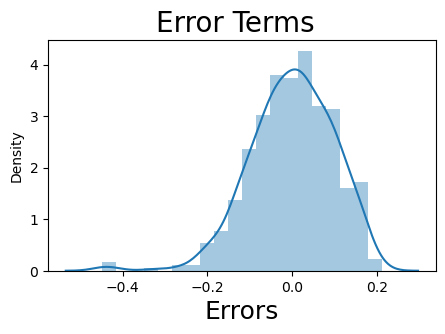

In [203]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = [5,3])
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

#### Applying the scaling on the test sets

In [205]:
num_vars = ['yr', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [207]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,weathersit_light snow,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.485264,0.031963,0.492390,0.698630,0.551850,0.553801,0.562174,0.319257,0.245303,0.488001,0.484718,0.251142,0.273973,0.237443,0.041096,0.310502
std,0.500513,0.309882,0.176306,0.332097,0.459904,0.235346,0.232749,0.179169,0.157824,0.203287,0.228660,0.227716,0.434663,0.447017,0.426491,0.198967,0.463759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.027237,0.131791,-0.042808,-0.002058,-0.060643,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.336479,0.345502,0.427649,0.213225,0.089238,0.317381,0.330677,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.561806,0.576424,0.548144,0.303481,0.200235,0.494793,0.497042,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.746636,0.729541,0.689408,0.400400,0.311820,0.644410,0.635156,0.500000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.983385,1.049574,1.012910,0.807474,0.888562,0.995559,0.941205,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [209]:
y_test = df_test.pop('cnt')
X_test = df_test

In [211]:
# Adding constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)
X_test_m8.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,season_spring,season_summer,season_winter,weathersit_light snow,weathersit_misty
185,1.0,0.0,0.545455,0,0.666667,1,0.856704,0.850415,0.519634,0.180484,0.300500,0.492802,0,0,0,0,0
639,1.0,1.0,0.818182,0,0.500000,1,0.662528,0.638242,0.882733,0.133655,0.089974,0.598469,0,0,1,1,0
300,1.0,0.0,0.818182,0,0.000000,0,0.338555,0.330295,0.513716,0.402389,0.131432,0.440276,0,0,1,0,1
222,1.0,0.0,0.636364,0,1.000000,0,0.820361,0.788671,0.304464,0.263333,0.236107,0.545789,0,0,0,0,0
153,1.0,0.0,0.454545,0,0.000000,0,0.698871,0.699963,0.214632,0.453215,0.261394,0.612251,0,1,0,0,0


In [213]:
# Creating X_test_m8 dataframe by dropping variables from X_test_m8

X_test_m8 = X_test_m8.drop(['mnth', 'workingday', 'temp', 'atemp', 'hum', 'registered', 'season_winter'], axis = 1)

In [215]:
# Making predictions using the eighth model

y_test_pred = lm_8.predict(X_test_m8)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

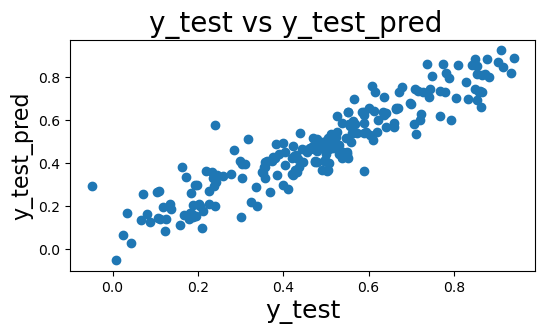

In [219]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = [6,3])
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

#### calculate the R-squared score on the test set

In [221]:
from sklearn.metrics import r2_score

In [224]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8566174791108057

#### Final Linear Regression model is 0.3151 + 0.2121*yr - 0.1104*holiday + 0.1309*weekday - 0.0733*windspeed + 0.4860*casual - 0.2124*season_spring - 0.0479*season_summer - 0.2285*weathersit_light snow - 0.0543*weathersit_misty   